# Covid 19 Prediction

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [2]:
# Reading the dataset 
df = pd.read_csv('../input/covid-aggregated-data/Covid.csv')
df = df.iloc[:,:-2]

In [3]:
df.head()

,NoOfDays,Date,Month,TotalConfirmedCases,TotalDeaths,TotalClosedCases,TotalPositiveCases,TotalSamples,Recoverd_cases,ClosedCases
0,1,30,1,1,0,0,1,3.0,0,0
1,2,31,1,1,0,0,1,3.0,0,0
2,3,1,2,2,0,0,2,5.0,0,0
3,4,2,2,3,0,0,3,6.0,0,0
4,5,3,2,3,0,0,3,6.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NoOfDays             117 non-null    int64  
 1   Date                 117 non-null    int64  
 2   Month                117 non-null    int64  
 3   TotalConfirmedCases  117 non-null    int64  
 4   TotalDeaths          117 non-null    int64  
 5   TotalClosedCases     117 non-null    int64  
 6   TotalPositiveCases   117 non-null    int64  
 7   TotalSamples         111 non-null    float64
 8   Recoverd_cases       117 non-null    int64  
 9   ClosedCases          117 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 9.3 KB


Some of the values of total samples are missing

# Explatory Data Analysis

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

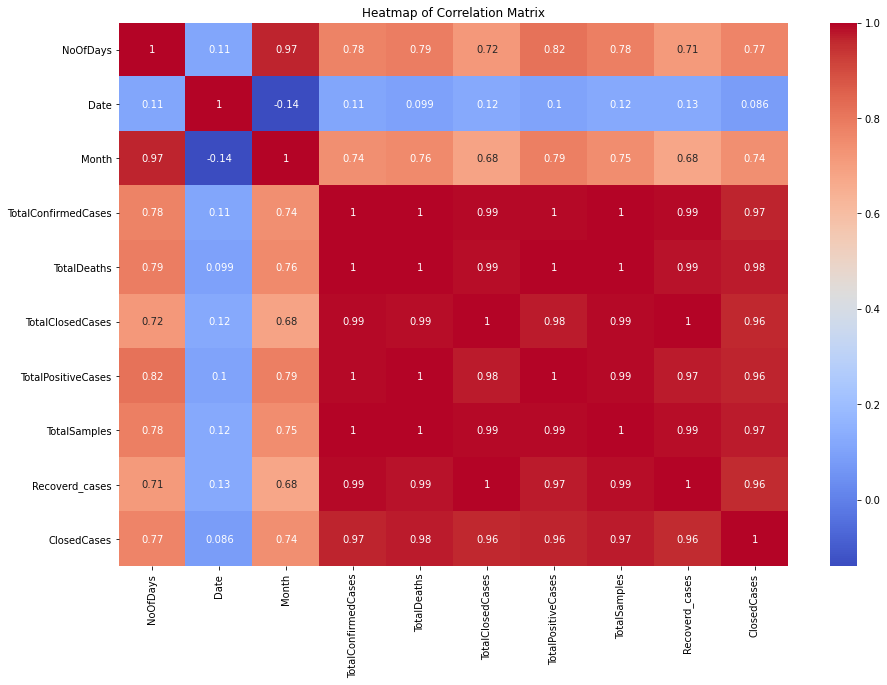

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot =True)
plt.title('Heatmap of Correlation Matrix')

As expected, most of the features are inter-related

Text(0, 0.5, 'Total Cases')

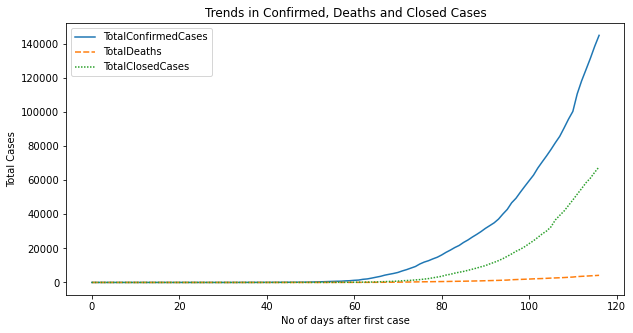

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df[['TotalConfirmedCases','TotalDeaths','TotalClosedCases']],size=1000)
plt.title('Trends in Confirmed, Deaths and Closed Cases')
plt.xlabel('No of days after first case')
plt.ylabel('Total Cases')

Text(0, 0.5, 'Total Cases')

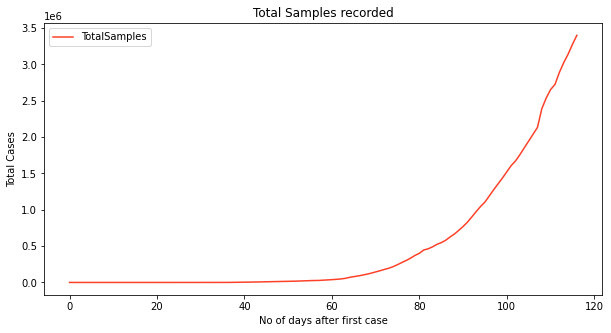

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df[['TotalSamples']],style='event',size=1000,palette='CMRmap_r')
plt.title('Total Samples recorded')
plt.xlabel('No of days after first case')
plt.ylabel('Total Cases')

Every feature tends to have an exponential increase

# Preprocessing

Firstly, we have to fill the missing values
- For this purpose polynomial regressor is used because it performs well for the spread of pandemic. Moreover, it is self explanatory from Explotory Data Analysis

In [8]:
dataset = pd.read_csv('../input/covid-aggregated-data/Covid.csv')
#dataset = dataset.iloc[:,:-3]
dataset.dropna(axis=0,inplace=True)
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 7:8].values
poly_reg = PolynomialFeatures(degree =3,include_bias =False)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 =LinearRegression(fit_intercept = False,normalize = True)
lin_reg_2.fit(X_poly,y)

LinearRegression(fit_intercept=False, normalize=True)

In [9]:
# Predicting the Missing value 
dataset = pd.read_csv('../input/covid-aggregated-data/Covid.csv')
#dataset = dataset.iloc[:,:-3]
y_pred1 = lin_reg_2.predict(poly_reg.fit_transform(np.array([range(45,49),range(14,18)]).transpose()) )
y_pred2 = lin_reg_2.predict(poly_reg.fit_transform(np.array([range(59,61),range(28,30)]).transpose()))

In [10]:
# Predicting the Total no of samples that should have been taken till 31st July 2020  
Samples_31_July =  lin_reg_2.predict(poly_reg.fit_transform(np.array([[184,31]])))
print('no. of samples till 31st July - {} '.format(Samples_31_July[0][0]))

no. of samples till 31st July - 22126020.38766625 


In [11]:
# Replacing a missing values with predicted one's
missing = [0] * len(dataset)
missing[44:48] = [j for sub in y_pred1 for j in sub]
missing[58:60] = [j for sub in y_pred2 for j in sub]
missing = pd.DataFrame(np.array(missing))
missing = missing.rename(columns={0:'MissingSamplesValues'})
df = pd.concat([dataset,missing],axis=1)
df = df.fillna(0)
df['Samples'] = df['MissingSamplesValues'] + df['TotalSamples']
df.drop(['MissingSamplesValues','TotalSamples'],axis=1,inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NoOfDays             117 non-null    int64  
 1   Date                 117 non-null    int64  
 2   Month                117 non-null    int64  
 3   TotalConfirmedCases  117 non-null    int64  
 4   TotalDeaths          117 non-null    int64  
 5   TotalClosedCases     117 non-null    int64  
 6   TotalPositiveCases   117 non-null    int64  
 7   Recoverd_cases       117 non-null    int64  
 8   ClosedCases          117 non-null    int64  
 9   RecoveryRate         117 non-null    float64
 10  DeathRate            117 non-null    float64
 11  Samples              117 non-null    float64
dtypes: float64(3), int64(9)
memory usage: 11.1 KB


We can observ there are no missing values

# Prediction of Total no of Infections till 31st July

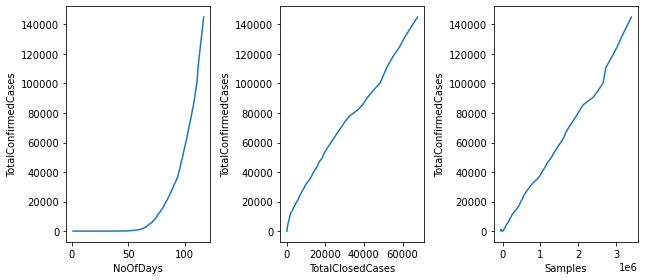

In [13]:
fig = plt.figure(figsize=(15,4));   
ax1 = fig.add_subplot(1,5,1);
ax2 = fig.add_subplot(1,5,2);
ax3 = fig.add_subplot(1,5,3);
#ax4 = fig.add_subplot(1,5,4);
#ax5 = fig.add_subplot(1,5,5);

sns.lineplot(x=df['NoOfDays'],y=df['TotalConfirmedCases'],data=df,ax=ax1)
sns.lineplot(x=df['TotalClosedCases'],y=df['TotalConfirmedCases'],data=df,ax=ax2)
#sns.lineplot(x=df['DeathRate'],y=df['TotalConfirmedCases'],data=df,ax=ax3)
#sns.lineplot(x=df['RecoveryRate'],y=df['TotalConfirmedCases'],data=df,ax=ax4)
sns.lineplot(x=df['Samples'],y=df['TotalConfirmedCases'],data=df,ax=ax3)
plt.tight_layout()

# Relation of features with Total Coinfirmed cases 

To check which parameters explains the most variance, we'll train a polynomial regression model beacuse according to the plots and visualisations, the relation of mostly following polynomial trend

In [14]:
X = df[['NoOfDays','Date','Month','TotalClosedCases','TotalPositiveCases']]
y = df['TotalConfirmedCases']

from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
poly = PolynomialFeatures(degree = 3)
X_p = poly.fit_transform(X)
regressor =PCA(7)
regressor.fit(X_p,y)

print((regressor.explained_variance_ratio_)*100)

[9.97468820e+01 2.52197890e-01 9.12473541e-04 4.88134339e-06
 2.76476617e-06 2.70170111e-08 1.77162888e-09]


No of Days after first confirmed case explains 98% of the variance and date explain the other 2% 
Rest of the features, for obvious, have a linear relation with TotalConfirmedCases, so they explain less variance
Moreover, these features are inter - related with each other 
Better option is to leave these features

But we know that recovery or death rate are important parameters beacuseuse they there values tend to change with time 

For Predicting the values on 31st of July, we dont have the recovery and death rate
But we can have an idea of Samples tested using above trained model

To solve this particular problem
we can make a chain of Predictions

By using Number of Days, date and samples tested, we will predict the no of infections
Using that Data, we will predict the No of closed cases -> deaths (direct relation with closed cases)   
Again, using above data we will predict Recovery and death rate

In [15]:
X = df.iloc[:,[0,2,-1]].values
y = df['TotalConfirmedCases']
poly2 = PolynomialFeatures(degree =2)
X_poly = poly2.fit_transform(X)
regressor2 =LinearRegression()
regressor2.fit(X_poly,y)



LinearRegression()

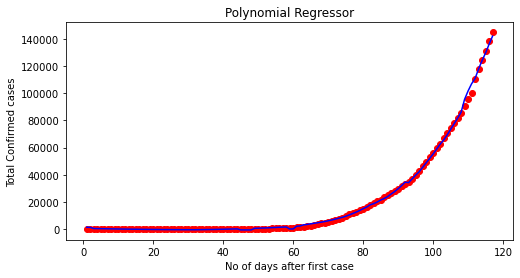

In [16]:
#visualising the polonomial regressor
plt.figure(figsize=(8,4))
plt.scatter(X[:,0],y,color = 'red')
plt.plot(X[:,0],regressor2.predict(poly2.fit_transform(X)),color='blue')
plt.title('Polynomial Regressor')
plt.xlabel('No of days after first case')
plt.ylabel('Total Confirmed cases')
plt.show()

In [17]:
Date = 31
Month =7
Days = 184
Samples = Samples_31_July[0,0]
X1 = np.array([[Days,Month,Samples]])
Total_infections  = regressor2.predict(poly2.fit_transform(X1))

In [18]:
print('Total No of Infection o 31st July -> {}'.format(int(Total_infections[0])))

Total No of Infection o 31st July -> 811467


# Total No of Infection o 31st July -> 811467

# Predicting no of deaths on 31st july 

First we need information about the closed cases 

In [19]:
# Predicting No of closed cases
X_closed = df.iloc[:,[0,1,2,3,-1]].values
y = df['TotalClosedCases']
poly3 = PolynomialFeatures(degree = 1)
X_poly = poly3.fit_transform(X_closed)
regressor3 =LinearRegression()
regressor3.fit(X_poly,y)

Date = 31
Month =7
Days = 184
Samples = Samples_31_July[0,0]
Infections = Total_infections[0]
X1 = np.array([[Days,Date,Month,Infections,Samples]])
Total_closed  = regressor3.predict(poly3.fit_transform(X1))

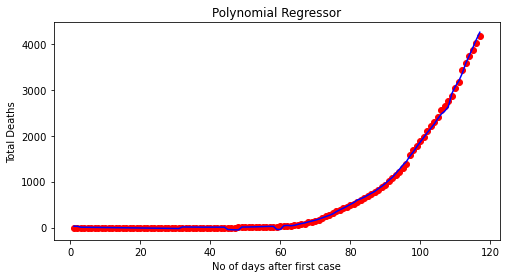

In [20]:
# predicting no of deaths 
X_death = df.iloc[:,[0,1,2,3,5,-1]].values
y = df['TotalDeaths']
poly4 = PolynomialFeatures(degree = 1)
X_poly = poly4.fit_transform(X_death)
regressor4 =LinearRegression()
regressor4.fit(X_poly,y)

plt.figure(figsize=(8,4))
plt.scatter(X_death[:,0],y,color = 'red')
plt.plot(X_death[:,0],regressor4.predict(poly4.fit_transform(X_death)),color='blue')
plt.title('Polynomial Regressor')
plt.xlabel('No of days after first case')
plt.ylabel('Total Deaths')
plt.show()



In [21]:
Date = 31
Month =7
Days = 184
Samples = Samples_31_July[0,0]
Infections = Total_infections[0]
Closed = Total_closed[0]
X1 = np.array([[Days,Date,Month,Infections,Closed,Samples]])
Total_deaths  = regressor4.predict(poly4.fit_transform(X1))

In [22]:
print('Total No of Deaths o 31st July -> {}'.format(int(Total_deaths[0])))

Total No of Deaths o 31st July -> 26652


# Total No of Deaths o 31st July -> 26652

# Predicting Death and recovory rate

 we know that,
 - Death rate = (Death cases / Total closed cases) * 100
 - Recovery rate = (recovered cases / Total closed cases) *100

No particular trend, so just using previous information to train a model

In [23]:
Date = np.concatenate((np.arange(15,31),np.arange(1,32)),axis=0)
Month =([6]*16) + ([7]*31)
Days = np.arange(138,185)
Samples_ = lin_reg_2.predict(poly_reg.fit_transform(np.array([Days,Date]).transpose()))
Samples_ = np.array([j for sub in Samples_ for j in sub])
X1 = np.array([Days,Month,Samples_]).transpose()
Total_infections_Range  = regressor2.predict(poly2.fit_transform(X1))
X2 = np.array([Days,Date,Month,Total_infections_Range,Samples_]).transpose()
Total_closed_Range  = regressor3.predict(poly3.fit_transform(X2))
X3 = np.array([Days,Date,Month,Total_infections_Range,Total_closed_Range,Samples_]).transpose()
Total_deaths_Range  = regressor4.predict(poly4.fit_transform(X3))

DeathRate = ((Total_deaths_Range)/(Total_closed_Range)) * 100
DeathRate = pd.Series(DeathRate)

In [24]:
DeathRate
# the values are in percenatge

0     6.323039
1     6.293115
2     6.264335
3     6.236627
4     6.209921
5     6.184156
6     6.159270
7     6.135209
8     6.111919
9     6.089351
10    6.067457
11    6.046194
12    6.025518
13    6.005390
14    5.985772
15    5.966628
16    6.508379
17    6.499149
18    6.491101
19    6.484193
20    6.478384
21    6.473636
22    6.469911
23    6.467175
24    6.465396
25    6.464542
26    6.464583
27    6.465491
28    6.467238
29    6.469799
30    6.473147
31    6.477259
32    6.482111
33    6.487680
34    6.493943
35    6.500879
36    6.508467
37    6.516686
38    6.525515
39    6.534933
40    6.544922
41    6.555461
42    6.566529
43    6.578109
44    6.590178
45    6.602719
46    6.615710
dtype: float64

Now, analysing recovery rate

In [25]:
# Now we have Total cases, we just have to Find total recovered cases: Closed - deaths
Total_recoverd_Range = Total_closed_Range -Total_deaths_Range
RecoveryRate = ((Total_recoverd_Range)/(Total_closed_Range)) * 100

In [26]:
RecoveryRate =pd.Series(RecoveryRate)
RecoveryRate

0     93.676961
1     93.706885
2     93.735665
3     93.763373
4     93.790079
5     93.815844
6     93.840730
7     93.864791
8     93.888081
9     93.910649
10    93.932543
11    93.953806
12    93.974482
13    93.994610
14    94.014228
15    94.033372
16    93.491621
17    93.500851
18    93.508899
19    93.515807
20    93.521616
21    93.526364
22    93.530089
23    93.532825
24    93.534604
25    93.535458
26    93.535417
27    93.534509
28    93.532762
29    93.530201
30    93.526853
31    93.522741
32    93.517889
33    93.512320
34    93.506057
35    93.499121
36    93.491533
37    93.483314
38    93.474485
39    93.465067
40    93.455078
41    93.444539
42    93.433471
43    93.421891
44    93.409822
45    93.397281
46    93.384290
dtype: float64

# Recovery rate remains constant ~(93%) and so is the death rate ~(7%)